<a href="https://colab.research.google.com/github/MechMaster95/MNSIT/blob/master/Working_CNN_datacamp_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


4423680/4422102 [==============================] - 8s 2us/step
training data shape:  (60000, 28, 28) (60000,)
test data shape:  (10000, 28, 28) (10000,)
total no of outputs: 10
output classes : [0 1 2 3 4 5 6 7 8 9]
original label 9
one hot encoding [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0  

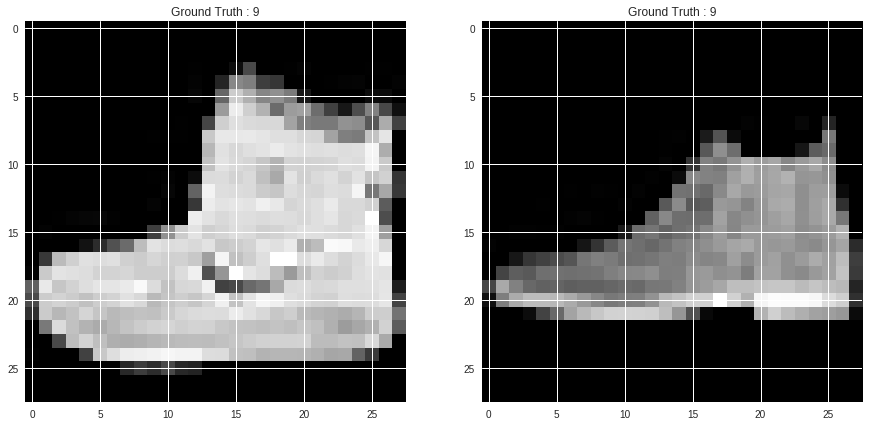

In [0]:
import keras
from keras.datasets import fashion_mnist
(train_X,train_Y),(test_X,test_Y) = fashion_mnist.load_data()

import numpy as np
from keras.utils import to_categorical ###??????
import matplotlib.pyplot as plt

print("training data shape: ",train_X.shape,train_Y.shape)
print("test data shape: ",test_X.shape,test_Y.shape)
# Find the unique numbers from the train labels

classes = np.unique(train_Y)
nClasses=len(classes)
print("total no of outputs:", nClasses)
print("output classes :", classes)

import matplotlib.pyplot as plt
plt.figure(figsize=[15,15])

## Displaying the first image in the training set

plt.subplot(1,2,1)
plt.imshow(train_X[0,:,:], cmap="gray")
plt.title("Ground Truth : {}".format(train_Y[0]))

#### .format????

## Displaying the first image in the test set

plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap="gray")
plt.title("Ground Truth : {}".format(test_Y[0]))


train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1, 28, 28,1)
train_X.shape, test_X.shape

train_X = train_X.astype('float32')
test_X = test_X.astype("float32")
##why are we changing types?????
train_X = train_X/255.
test_X = test_X/255.

## changing the labels to one hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print("original label {}".format(train_Y[0]))
print("one hot encoding", train_Y_one_hot[0])

from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

### we use random state as a measure that every time we run the code the training and 
#validation split is occuring in the same random manner i.e. same samples

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

batch_size = 64
epochs =  20
num_classes = 10

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3,3),activation="linear",input_shape=(28,28,1),padding="same"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2),padding="same"))
fashion_model.add(Conv2D(64,(3,3),activation="linear",padding="same"))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=["accuracy"])
fashion_model.summary()
fashion_train = fashion_model.fit(train_X,train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

#Convolutional Neural Nets


In [0]:
fashion_model.save("fashion_model_dropout.h5py")

In [0]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 6s 647us/step
